<a href="https://colab.research.google.com/github/franklinhamer2727/Apuntes-de-IA/blob/main/Big_Data_%26_Data_sciencie_UCM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip Hotel_Reviews.csv.zip -d ./data
!ls

unzip:  cannot find or open Hotel_Reviews.csv.zip, Hotel_Reviews.csv.zip.zip or Hotel_Reviews.csv.zip.ZIP.
drive  sample_data


EXPLORACION, TRANFORMACION Y VISUALIZACION DE DATASET

- 1.1 EDA (analisis exploratorio)
- 1.2 Preprocesado
- 1.3 Visualización

TEXT MINING

- 2.1 Modelo de clasificaion para detectar reseñas negativas
  - Adquisicion de data textual
  - Mormalizacion (preprocesado de texto)
  - Visualizacion previa al modelo
  - Analisis de sentimeinto con TextBlob
  - Vectorizacion
  - Contruccion del modelo
  - Evaluacion del modelo
- 2.2 Clustering de hoteles segun sus reseñas (Word Embeddings)
- 2.3 Topic Modelling



In [3]:
import pandas as pd
pd.set_option('display.max_columns',None)
from pandas_profiling import ProfileReport
from pandas.api.types import is_string_dtype, is_numeric_dtype,is_object_dtype
import numpy as np

#Graficos
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import gridspec
from matplotlib.pyplot import *
import seaborn as sns

#Procesamiento de modelado
from sklearn import tree
from sklearn.metrics import accuracy_score, auc, make_scorer, confusion_matrix
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#Librerias de procesamiento de texto
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import sys


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [4]:
!pip install textblob
!python -m spacy download en_core_web_sm
!pip install textblob
!pip install -U gensim


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2022-11-28 01:39:12.377258: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 5.2 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.2 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [5]:
import spacy
from textblob import TextBlob
#Gnerador de una nube de palabras
from wordcloud import WordCloud, STOPWORDS
#word embeddings
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from gensim.models import Word2Vec
from scipy.spatial.distance import cdist
#visualizacion  tipic modelling


import pickle #guardar el modelo
#varios
import itertools
from itertools import chain
from collections import Counter
import scipy as sp
from tqdm.autonotebook import tqdm
tqdm.pandas()
import scipy.stats as ss
import random

%matplotlib inline
sns.set()
#configuracion de adventencias
import warnings
warnings.filterwarnings('ignore')



In [6]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=708942f124bfc31d48da7a57092cda130a5481710796e8894ece6ebead51f7da
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=ec778b0fef56b3c71b7d8d1b9931e9acc69d790a668a0803ed22b68f7bd79a19
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built pyLDAvis sklearn


In [7]:
import pyLDAvis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [12]:
url = '/content/drive/MyDrive/Data_machine_learnin/Hotel_Reviews.csv'
#usamos skipinitialspace para poder borrar espacios en blanco en columnas con texto
dataset =pd.read_csv(url, skipinitialspace=True)


In [13]:
nRow,nCol = dataset.shape
print(f'El dataset tiene {nRow} filas y {nCol} columnas')

El dataset tiene 515738 filas y 17 columnas


## Exploracion , Tranformacion y visualizacion de dataset
###EDA(Analisis Exploratorio)

In [14]:
dataset.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available ...,397,1403,Only the park outside of the hotel was beautiful,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great l...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficult...,42,1403,Location was good and staff were ok It is cute...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk bar...,210,1403,Great location in nice surroundings the bar an...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line yo...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [15]:
#verificamos las filas duplicadas
duplicated = dataset.duplicated().sum()
print(f'El dataset tienen {duplicated} filas duplicadas')


El dataset tienen 526 filas duplicadas


In [17]:
#Borramso las filas duplicadas
df = dataset.drop_duplicates()
df.shape

(515212, 17)

In [18]:
#verificamos el tipo de columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515212 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515212 non-null  object 
 1   Additional_Number_of_Scoring                515212 non-null  int64  
 2   Review_Date                                 515212 non-null  object 
 3   Average_Score                               515212 non-null  float64
 4   Hotel_Name                                  515212 non-null  object 
 5   Reviewer_Nationality                        514690 non-null  object 
 6   Negative_Review                             514215 non-null  object 
 7   Review_Total_Negative_Word_Counts           515212 non-null  int64  
 8   Total_Number_of_Reviews                     515212 non-null  int64  
 9   Positive_Review                             515019 non-null  object 
 

In [19]:
#Realizamos una analisis estadistico de columnas numericas
df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515212.000000,515212.000000,515212.000000,515212.000000,515212.000000,515212.000000,515212.000000,511944.000000,511944.000000
mean,498.416021,8.397767,18.540822,2744.698889,17.778256,7.164895,8.395532,49.443040,2.824222
std,500.668595,0.547952,29.693991,2318.090821,21.804541,11.039354,1.637467,3.468029,4.581637
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214277,-0.143649
50%,342.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,-0.000250
75%,660.000000,8.800000,23.000000,3633.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


- La puntuacion media de los hoteles observadas es 8.4/10
- La media de las palabras de opinion negativa es igual a 18.5 palabras( max 408), la positiva a 17.7 (max 395)
- La media del numero total de opiniones que recibio cada hotel es igual a 2743
- La mitad de turistas escribio hasta 3 opiniones


In [22]:
df.isna().sum().sort_values(ascending=False) #numeros de datos ausentes por variable

lng                                           3268
lat                                           3268
Negative_Review                                997
Reviewer_Nationality                           522
Positive_Review                                193
Review_Total_Positive_Word_Counts                0
days_since_review                                0
Tags                                             0
Reviewer_Score                                   0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Total_Negative_Word_Counts                0
Hotel_Name                                       0
Average_Score                                    0
Review_Date                                      0
Total_Number_of_Reviews                          0
dtype: int64

- Las variables Negative_Review y Positive_Review en el documento inicial tenian espacios en blanco (la gente a veces pone un espacio cuando no tienen nada que escribir). Al cargar el dataset usamos la característica "skipinitialspace=True" lo que nos ha permitido tener missings en vez de solo espacios vacíos no considerados como missigns.

- Cuando una persona no deja ningún comentario ni espacio en blanco en la opinión negativa, el sistema genera automáticamente las palabras "No Negative" en la columna de opinión negativa. Entonces, podemos concluir que los missings en las opiniones negativas son iguales a "No Negative". Lo mismo pasa con las opiniones positivas.

In [23]:
#Veamos el numero de categorias distintas de cada variable categorica
for column in df:
  if is_object_dtype(df[column]):
    print(column,len(df[column].unique()))

Hotel_Address 1493
Review_Date 731
Hotel_Name 1492
Reviewer_Nationality 227
Negative_Review 330010
Positive_Review 412600
Tags 55242
days_since_review 731


Todas las variables categoricas tienen la cardinalidad alta.

- Hay 1492 hoteles únicos
- La variable Reviewer_Nationality tiene 227 valores distintos lo que resulta interesante ya que en el mundo existe un total de 194 países soberanos o estados soberanos reconocidos por la ONU (para el año 2021).Por lo tanto, hay un total de 194 nacionalidades.

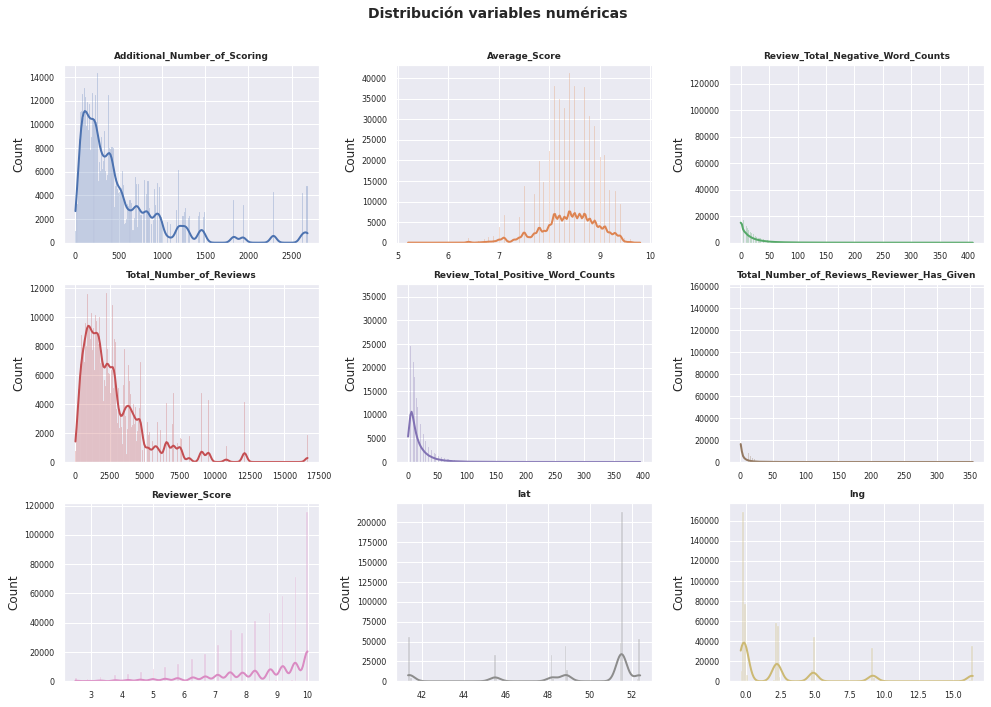

In [25]:
#Graficos de distribucion para cada varibale numerica
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 10))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int64']).columns
for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 9, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 14, fontweight = "bold");

###outliers (valores atípicos)

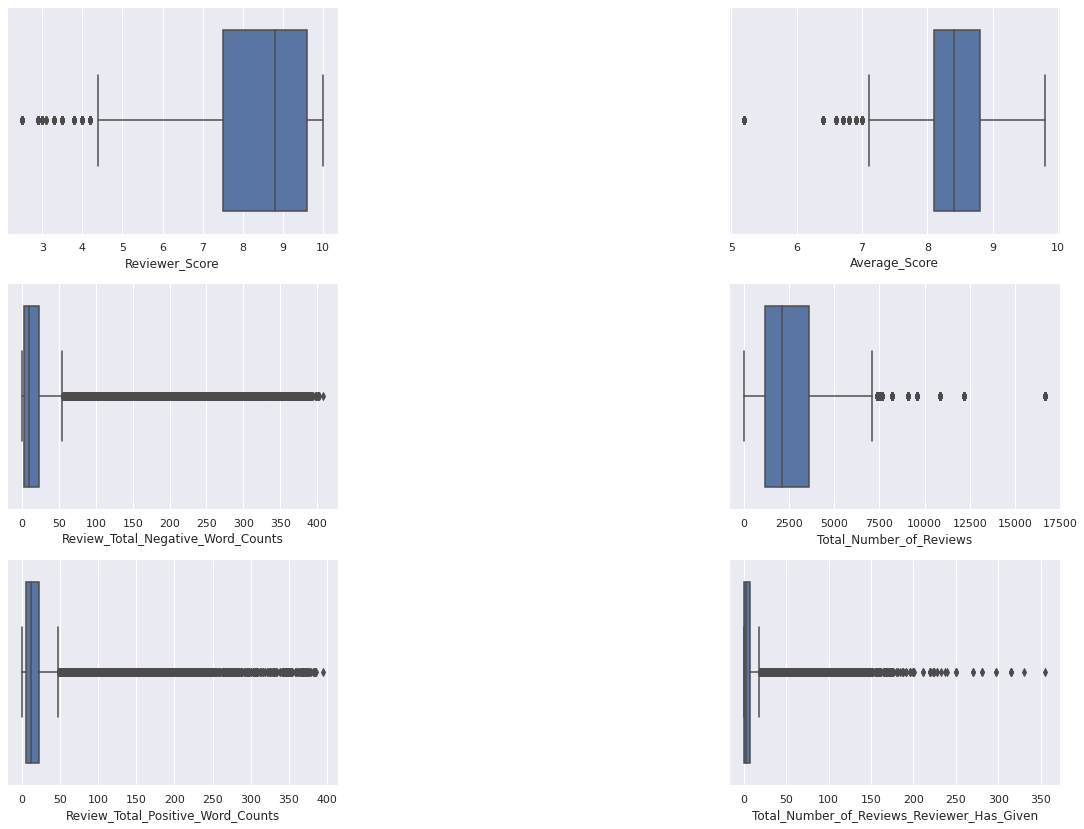

In [28]:
columnas = ['Reviewer_Score', 'Average_Score', 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 
           'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given']

n= 1
plt.figure(figsize=(20,15))
for column in columnas:
  plt.subplot(4,4,n)
  n = n+2
  sns.boxplot(df[column])
  plt.tight_layout()

###Pre- procesado

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515212 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515212 non-null  object 
 1   Additional_Number_of_Scoring                515212 non-null  int64  
 2   Review_Date                                 515212 non-null  object 
 3   Average_Score                               515212 non-null  float64
 4   Hotel_Name                                  515212 non-null  object 
 5   Reviewer_Nationality                        514690 non-null  object 
 6   Negative_Review                             514215 non-null  object 
 7   Review_Total_Negative_Word_Counts           515212 non-null  int64  
 8   Total_Number_of_Reviews                     515212 non-null  int64  
 9   Positive_Review                             515019 non-null  object 
 

In [31]:
#PREPROCESADO DE LA VARIBALE Review_Date
#tranformando la variable  "Review_date " en tres  varibales : año, mes, dia
df['month'] = pd.to_datetime(df['Review_Date']).dt.month.apply(str)
df['year'] = pd.to_datetime(df['Review_Date']).dt.year.apply(str)
df['day'] = pd.to_datetime(df['Review_Date']).dt.day.apply(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515212 entries, 0 to 515737
Data columns (total 20 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515212 non-null  object 
 1   Additional_Number_of_Scoring                515212 non-null  int64  
 2   Review_Date                                 515212 non-null  object 
 3   Average_Score                               515212 non-null  float64
 4   Hotel_Name                                  515212 non-null  object 
 5   Reviewer_Nationality                        514690 non-null  object 
 6   Negative_Review                             514215 non-null  object 
 7   Review_Total_Negative_Word_Counts           515212 non-null  int64  
 8   Total_Number_of_Reviews                     515212 non-null  int64  
 9   Positive_Review                             515019 non-null  object 
 

In [33]:
#Cambiando el numero del mes a su nombre
df['month'] = pd.to_datetime(df['Review_Date']).dt.month_name() 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515212 entries, 0 to 515737
Data columns (total 20 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515212 non-null  object 
 1   Additional_Number_of_Scoring                515212 non-null  int64  
 2   Review_Date                                 515212 non-null  object 
 3   Average_Score                               515212 non-null  float64
 4   Hotel_Name                                  515212 non-null  object 
 5   Reviewer_Nationality                        514690 non-null  object 
 6   Negative_Review                             514215 non-null  object 
 7   Review_Total_Negative_Word_Counts           515212 non-null  int64  
 8   Total_Number_of_Reviews                     515212 non-null  int64  
 9   Positive_Review                             515019 non-null  object 
 

In [35]:
#TRANFORMAMOS MISSINGS
#completando valores faltantes que solo tiene mas mes y un año( sin dia)
df['period'] = pd.to_datetime(df['Review_Date']).dt.strftime('%m/%Y') # => 7/
df['period'] = pd.to_datetime(df['period'])

In [36]:
df['period']

0        2017-08-01
1        2017-08-01
2        2017-07-01
3        2017-07-01
4        2017-07-01
            ...    
515733   2015-08-01
515734   2015-08-01
515735   2015-08-01
515736   2015-08-01
515737   2015-08-01
Name: period, Length: 515212, dtype: datetime64[ns]

In [38]:
#TRANSFORMAMOS MISSINGS
#Completando valores faltantes de 'Review-Nationality' por valores aleatorios ( en total solo 0.1% de missing)
random = np.random.choice(df['Reviewer_Nationality'])
df['Reviewer_Nationality']=df['Reviewer_Nationality'].fillna(random)

#Completando valores faltantes de opíniones
df['Negative_Review'] = df['Negative_Review'].fillna('No Negative')
df['Positive_Review'] = df['Negative_Review'].fillna('No Positive')

#controlando que no hayan valores faltantes
df[['Reviewer_Nationality', 'Negative_Review', 'Positive_Review']].isnull().any().any()

#Solo nos quedan missings en las varibales de longitud/latitud



False

In [39]:
#creamos nuevas columnas, contando las palabras de opiniones negativas y positivas
df.insert(7,'Negative_Word_Counts',df['Negative_Review'].str.split().str.len())
df.insert(11,'Positive_Word_Counts',df['Positive_Review'].str.split().str.len())

#poniendo a 0 el número de palabras donde no hay ninguna opinión
df.loc[df.Positive_Review == 'No Positive', ['Positive_Word_Counts']] = 0
df.loc[df.Negative_Review == 'No Negative', ['Negative_Word_Counts']] = 0

#borramos un espacio en blanco al final del texto en "Reviewer_Nationality":
df.Reviewer_Nationality = df.Reviewer_Nationality.str.rstrip()

# Creamos nueva columna con el país del hotel
def country_ident(st):
    last = st.split()[-1]
    if last == "Kingdom": return "United Kingdom"
    else: 
        return last
    
df["Hotel_Country"] = df["Hotel_Address"].apply(country_ident)

In [40]:
#borramos columnas 
df.drop(['Review_Date','Review_Total_Positive_Word_Counts', 'Review_Total_Negative_Word_Counts', 'Additional_Number_of_Scoring'],axis=1, inplace=True)

In [41]:
df.head()

,Hotel_Address,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,month,year,day,period,Hotel_Country
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,7.7,Hotel Arena,Russia,I am so angry that i made this post available ...,395,1403,I am so angry that i made this post available ...,395,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,August,2017,3,2017-08-01,Netherlands
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,7.7,Hotel Arena,Ireland,No Negative,0,1403,No Negative,2,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,August,2017,3,2017-08-01,Netherlands
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficult...,40,1403,Rooms are nice but for elderly a bit difficult...,40,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,July,2017,31,2017-07-01,Netherlands
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk bar...,208,1403,My room was dirty and I was afraid to walk bar...,208,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,July,2017,31,2017-07-01,Netherlands
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam N...,7.7,Hotel Arena,New Zealand,You When I booked with your company on line yo...,138,1403,You When I booked with your company on line yo...,138,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,July,2017,24,2017-07-01,Netherlands
